<a href="https://colab.research.google.com/github/sneha2003er/project/blob/main/random_forest_model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


## Load Data

In [ ]:
# Load images
train_fire_images = '/content/drive/MyDrive/data/dataset/img_data/train/fire'
train_default_images = '/content/drive/MyDrive/data/dataset/img_data/train/default'
train_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/train/smoke'

test_fire_images = '/content/drive/MyDrive/data/dataset/img_data/test/fire'
test_default_images ='/content/drive/MyDrive/data/dataset/img_data/test/default'
test_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/test/smoke'

In [ ]:
# load videos
train_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'
test_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'

## Import Libraries

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Prepare the Image Data:

In [ ]:
# Load images from a directory and label them
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return images, labels

In [ ]:
# Load training datasets
train_fire_imgs, train_fire_labels = load_images_from_folder(train_fire_images, 'fire')
train_default_imgs, train_default_labels = load_images_from_folder(train_default_images, 'default')
train_smoke_imgs, train_smoke_labels = load_images_from_folder(train_smoke_images, 'smoke')

# Load testing datasets
test_fire_imgs, test_fire_labels = load_images_from_folder(test_fire_images, 'fire')
test_default_imgs, test_default_labels = load_images_from_folder(test_default_images, 'default')
test_smoke_imgs, test_smoke_labels = load_images_from_folder(test_smoke_images, 'smoke')


In [ ]:
# Combine training and testing datasets
X_train = train_fire_imgs + train_default_imgs + train_smoke_imgs
y_train = train_fire_labels + train_default_labels + train_smoke_labels

X_test = test_fire_imgs + test_default_imgs + test_smoke_imgs
y_test = test_fire_labels + test_default_labels + test_smoke_labels

## Create and Train a Random Forest Model:

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict and Evaluate the Model:



In [ ]:
# Predict on train and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Concatenate predictions and ground truths
all_y_true = y_train + y_test
all_y_pred = list(y_train_pred) + list(y_test_pred)

# Calculate overall accuracy
overall_accuracy = accuracy_score(all_y_true, all_y_pred)

print(f"Overall Accuracy: {overall_accuracy}")

Overall Accuracy: 0.8886756238003839


## Confusion Matrix:

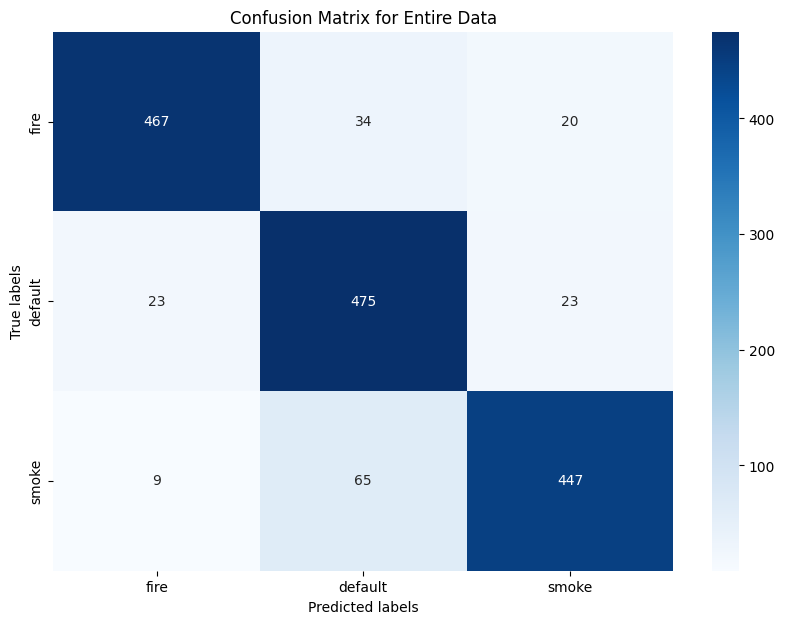

In [ ]:
# Confusion matrix for the entire data
cm = confusion_matrix(all_y_true, all_y_pred, labels=["fire", "default", "smoke"])

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["fire", "default", "smoke"],
            yticklabels=["fire", "default", "smoke"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Entire Data')
plt.show()

In [ ]:
# Calculate precision, recall, and F1 score for each class
precision = precision_score(all_y_true, all_y_pred, average=None)
recall = recall_score(all_y_true, all_y_pred, average=None)
f1 = f1_score(all_y_true, all_y_pred, average=None)

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(all_y_true, all_y_pred, average='weighted')
overall_recall = recall_score(all_y_true, all_y_pred, average='weighted')
overall_f1 = f1_score(all_y_true, all_y_pred, average='weighted')



In [ ]:
# Print the results
print("Class-wise Precision:", precision)
print("Class-wise Recall:", recall)
print("Class-wise F1 Score:", f1)

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1)

Class-wise Precision: [0.82752613 0.93587174 0.9122449 ]
Class-wise Recall: [0.91170825 0.89635317 0.85796545]
Class-wise F1 Score: [0.86757991 0.91568627 0.884273  ]
Overall Precision: 0.8918809246167796
Overall Recall: 0.8886756238003839
Overall F1 Score: 0.8891797267394147
